STEP 1: IMPORT ALL NECESSARY LIBRARIES AND LOAD DATA

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load the dataset
# Make sure 'Housing.csv' is in the same directory as your Jupyter Notebook,
# or provide the full path to the file.
df = pd.read_csv('Housing.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [110]:
#Dataset Information (Data Types and Non-Null Counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [111]:
#Descriptive Statistics for Numerical Columns 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [112]:
#Missing Values Count per Column 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

STEP 2: CONVERT DATA INTO SUITABLE FORMAT

In [113]:
# Convert 'date' column to datetime objects
# The format 'YYYYMMDDTHHMMSS' needs to be parsed correctly.
df['date'] = pd.to_datetime(df['date'])

# Extract useful features from the 'date' column
# We can get the year, month, and day of the sale.
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['sale_day'] = df['date'].dt.day

# Drop the original 'date' column as we have extracted relevant information
df = df.drop('date', axis=1)

# The 'id' column is a unique identifier and not useful for prediction, so we drop it.
df = df.drop('id', axis=1)

# Check for duplicate rows in the dataset
# If duplicates exist, they can skew our analysis and model training.
print("\n--- Dataset after preprocessing 'date' and dropping 'id' ---")
df.head()


--- Dataset after preprocessing 'date' and dropping 'id' ---


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,sale_day
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


STEP 3: CREATE VISUALIZATIONS FOR DATA

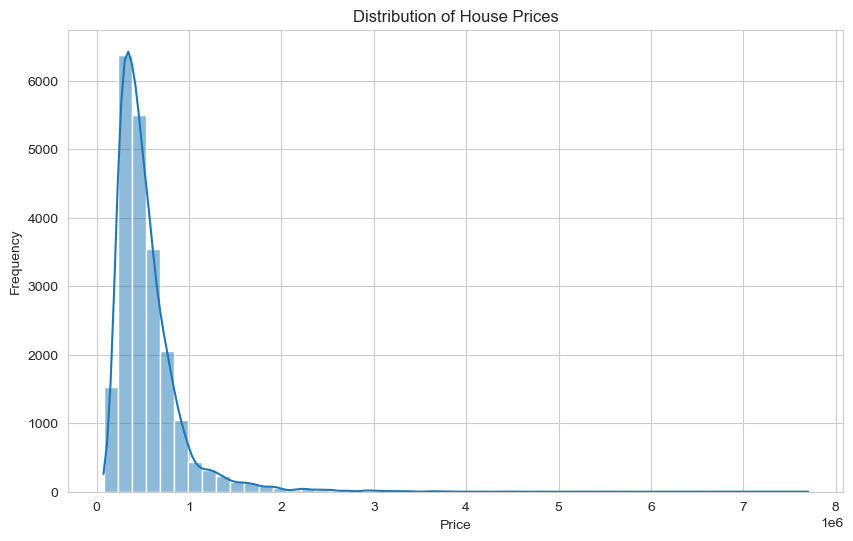

In [114]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# --- Distribution of the target variable: 'price' ---
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

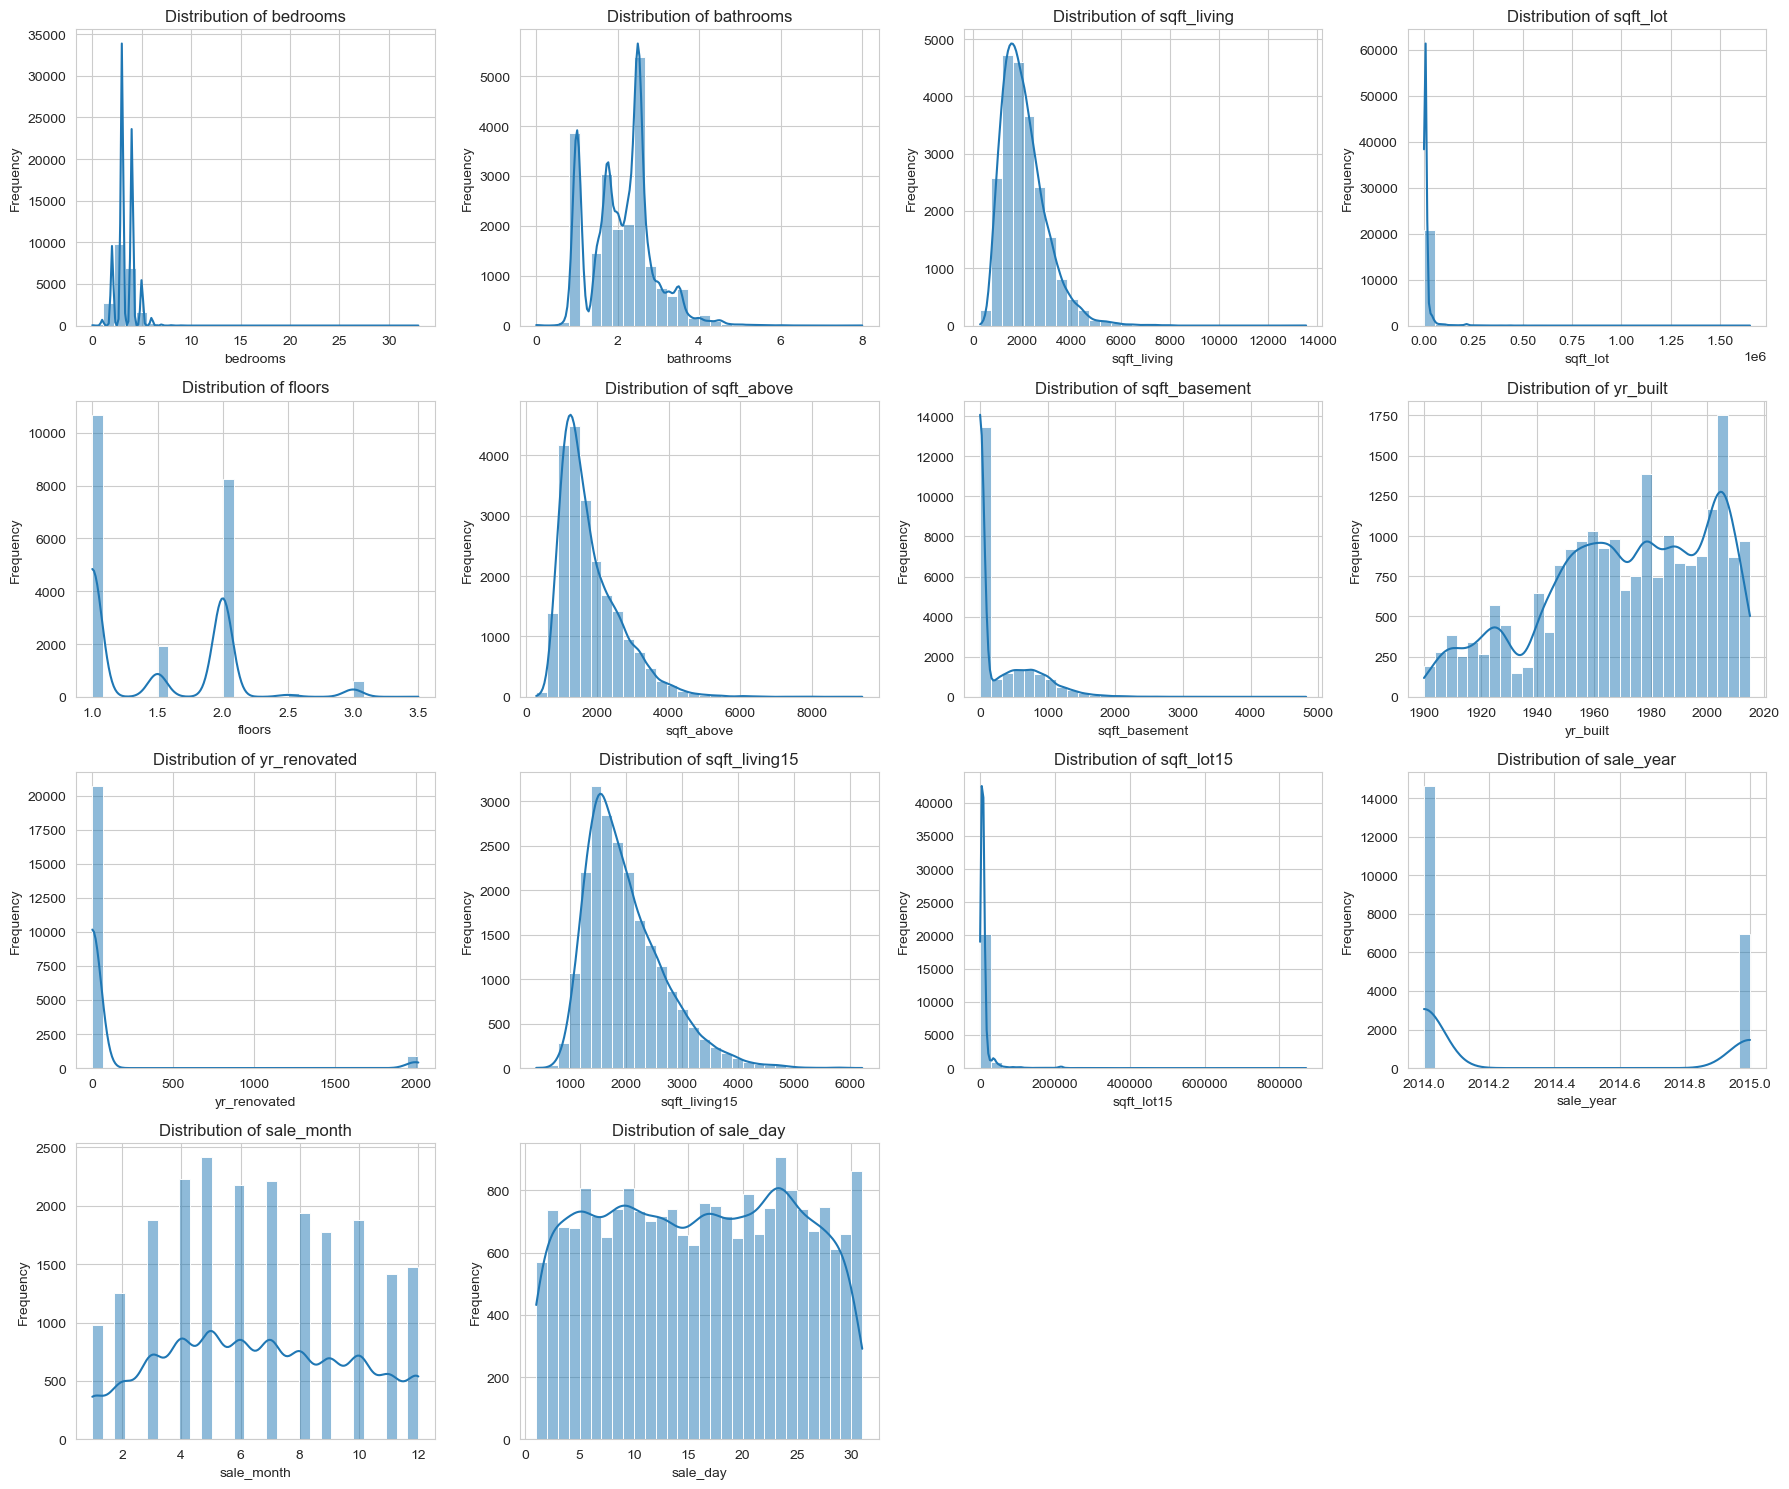

In [115]:
# --- Distributions of key numerical features ---
# Create a list of numerical columns to visualize (excluding price for now)
numerical_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                  'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month', 'sale_day']

plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Adjust subplot grid based on number of features
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


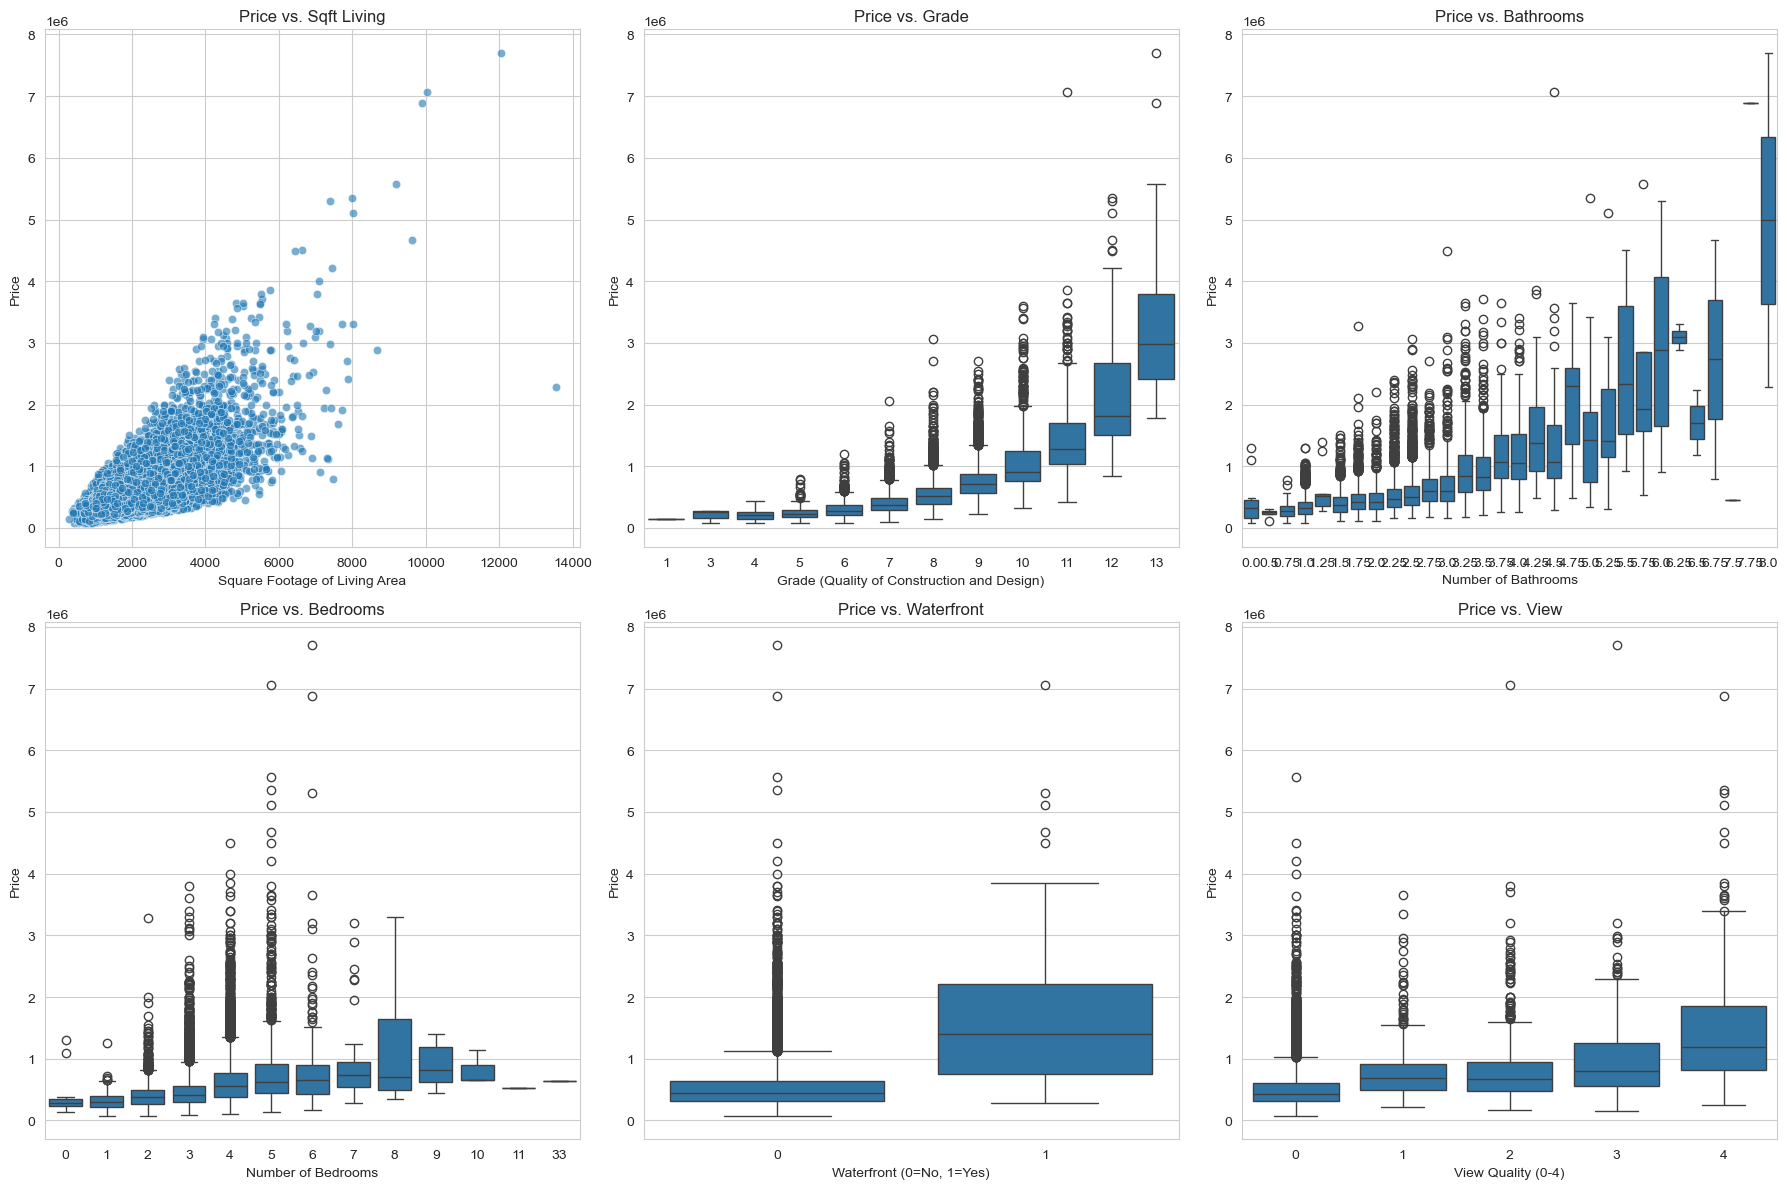

In [116]:
# --- Relationship between key features and 'price' (Scatter Plots) ---
plt.figure(figsize=(18, 12))

# sqft_living vs price
plt.subplot(2, 3, 1)
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title('Price vs. Sqft Living')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')

# grade vs price
plt.subplot(2, 3, 2)
sns.boxplot(x='grade', y='price', data=df)
plt.title('Price vs. Grade')
plt.xlabel('Grade (Quality of Construction and Design)')
plt.ylabel('Price')

# bathrooms vs price
plt.subplot(2, 3, 3)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

# bedrooms vs price
plt.subplot(2, 3, 4)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

# waterfront vs price
plt.subplot(2, 3, 5)
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price vs. Waterfront')
plt.xlabel('Waterfront (0=No, 1=Yes)')
plt.ylabel('Price')

# view vs price
plt.subplot(2, 3, 6)
sns.boxplot(x='view', y='price', data=df)
plt.title('Price vs. View')
plt.xlabel('View Quality (0-4)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


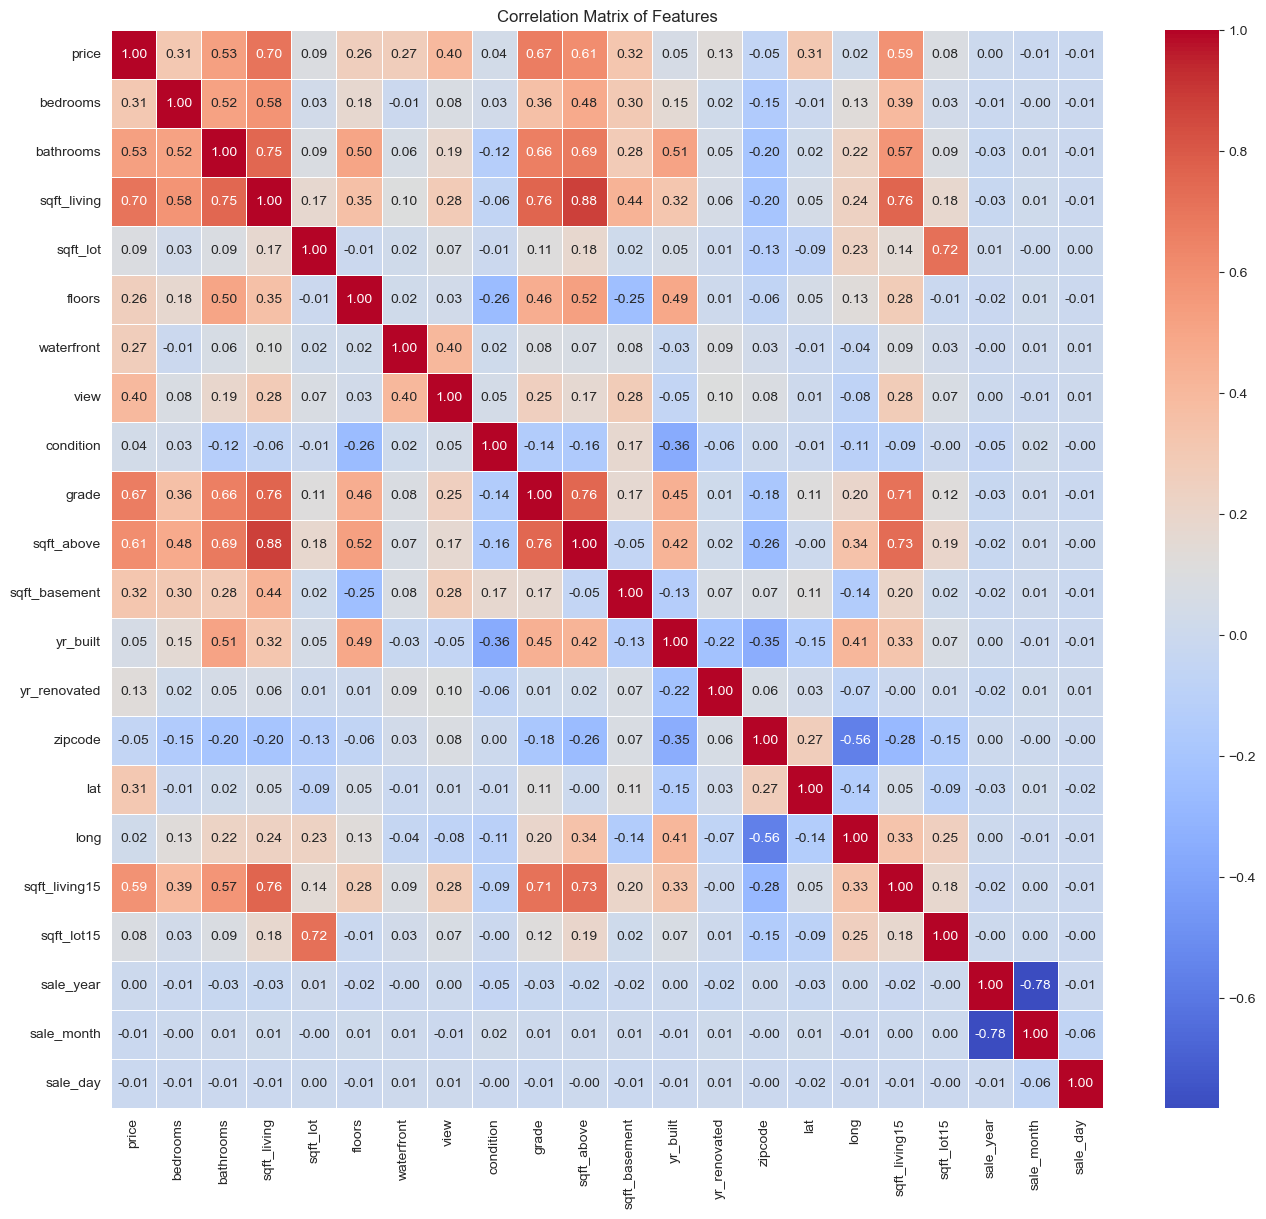

In [117]:
# --- Correlation Heatmap ---
# Calculate the correlation matrix for all numerical features
correlation_matrix = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


STEP 4: WORK ON AND CAP OUT OUTLIERS

In [147]:
# Identify numerical columns where outliers are common and impactful
# These are typically continuous variables or counts that can have extreme values.
outlier_cols = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement']

print("--- Outlier Detection and Capping using IQR Method ---")
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


--- Outlier Detection and Capping using IQR Method ---


In [119]:
 # Count outliers before capping
num_outliers_lower = df[df[col] < lower_bound].shape[0]
num_outliers_upper = df[df[col] > upper_bound].shape[0]
print(f"\nColumn: {col}")
print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"  Outliers below lower bound: {num_outliers_lower}")
print(f"  Outliers above upper bound: {num_outliers_upper}")



Column: sqft_basement
  Lower bound: -840.00, Upper bound: 1400.00
  Outliers below lower bound: 0
  Outliers above upper bound: 496


In [148]:
 # Cap the outliers: replace values outside bounds with the bounds themselves
df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
# Verify the effect of capping by checking descriptive statistics again
df[outlier_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.576690,367126.825086,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
bedrooms,21613.0,3.370795,0.930105,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_above,21613.0,1788.390691,828.090978,290.0,1190.00,1560.00,2210.0,9410.0
sqft_basement,21613.0,284.050155,417.064559,0.0,0.00,0.00,560.0,1400.0


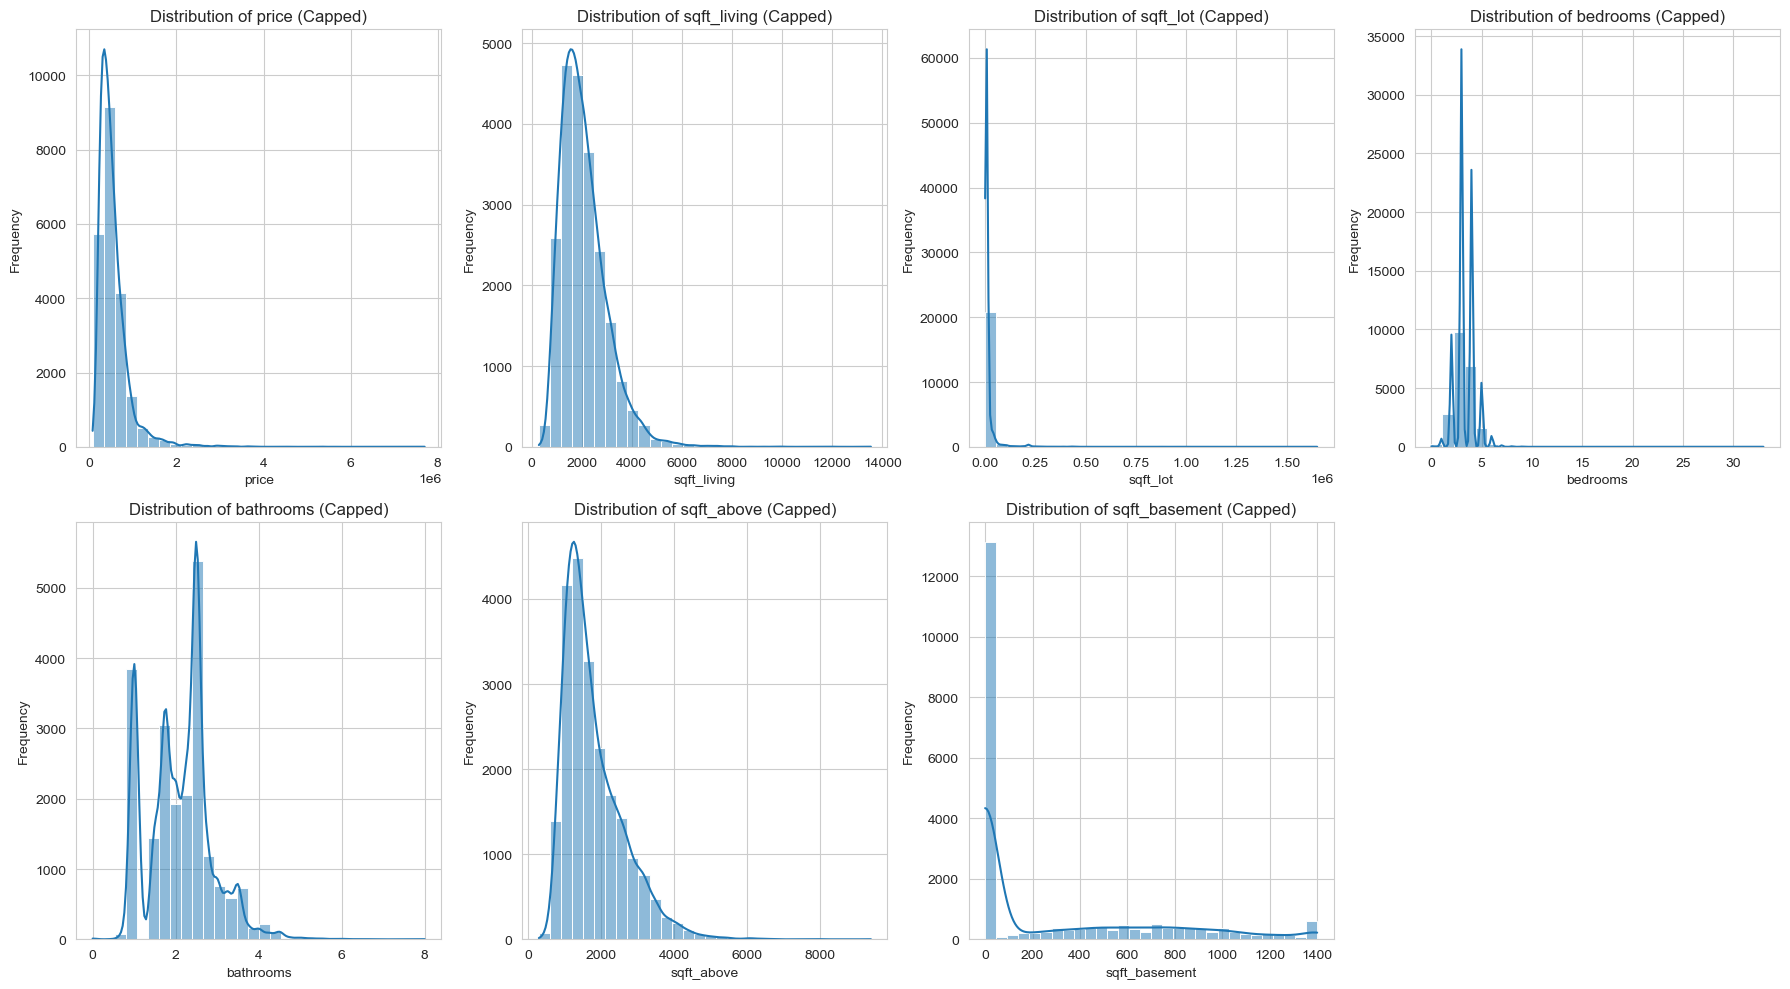

In [121]:
# Visualize distributions after capping to see the effect
plt.figure(figsize=(18, 10))
for i, col in enumerate(outlier_cols):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Capped)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [122]:
# Calculate correlation of all features with 'price'
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585378
bathrooms        0.525136
view             0.397294
bedrooms         0.308377
lat              0.307003
sqft_basement    0.289682
waterfront       0.266370
floors           0.256793
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054011
condition        0.036361
long             0.021626
sale_year        0.003575
sale_month      -0.010080
sale_day        -0.014670
zipcode         -0.053201
Name: price, dtype: float64


STEP 5: SELECT SUITABLE FEATURES FOR  MODEL DEVELOPMENT

In [123]:
selected_features = [
    'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
    'view', 'waterfront', 'bedrooms', 'floors', 'yr_built',
    'condition', 'sqft_lot', 'sqft_basement', 'sqft_lot15',
    'sale_year', 'lat', 'long' # Including geographical data and sale year
]

In [124]:
selected_features = [f for f in selected_features if f in df.columns and f != 'price']

X = df[selected_features]
y = df['price']

STEP 6: TRAIN AND TEST MODEL

In [125]:
# Split the data into training and testing sets
# We use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 17290 samples
Testing set size: 4323 samples


In [126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred = model.predict(X_test)
y_pred

array([347964.35221598, 395684.72242713, 388549.88043721, ...,
       894735.41516021, 626278.88202542, 557749.78026569])

In [128]:
r2 = r2_score(y_test, y_pred)
r2

0.7187988247458738

STEP 7: MODEL EVALUATION

In [130]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [159]:
lasso_pred=lasso_reg.score(X_test,y_test)
lasso_pred

0.7185205429985462

In [153]:
lasso_reg.score(X_train,y_train)

0.696369147919161

In [154]:
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 187743.3071


In [155]:

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

from sklearn.metrics import r2_score
print("Ridge R2 Score:", r2_score(y_test, ridge_pred))


Ridge R2 Score: 0.7186960779114522


In [156]:
def evaluate_model(name, y_true,y_pred):
    print(f"📌 {name}")
    print("R2 Score:", r2_score(y_true, lin_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("-" * 30)

In [161]:
evaluate_model("Linear Regression", y_test, y_pred)
evaluate_model("Lasso Regression", y_test, y_pred)

📌 Linear Regression
R2 Score: 0.7187988247458738
RMSE: 187743.30714879162
------------------------------
📌 Lasso Regression
R2 Score: 0.7187988247458738
RMSE: 187743.30714879162
------------------------------
